In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('datasets/netflix_titles.csv')

In [3]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [4]:
df["Length of Description"] = df["description"].apply(len)

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Length of Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,136
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,148
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",149
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",145
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,143


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   show_id                7787 non-null   object
 1   type                   7787 non-null   object
 2   title                  7787 non-null   object
 3   director               5398 non-null   object
 4   cast                   7069 non-null   object
 5   country                7280 non-null   object
 6   date_added             7777 non-null   object
 7   release_year           7787 non-null   int64 
 8   rating                 7780 non-null   object
 9   duration               7787 non-null   object
 10  listed_in              7787 non-null   object
 11  description            7787 non-null   object
 12  Length of Description  7787 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 791.0+ KB


In [8]:
df.shape

(7787, 13)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

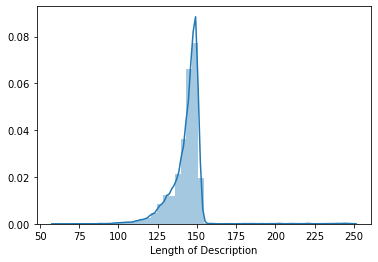

In [10]:
sns.distplot(df["Length of Description"])

In [11]:
df.describe()['Length of Description']

count    7787.000000
mean      143.100424
std        10.614146
min        61.000000
25%       140.000000
50%       146.000000
75%       149.000000
max       248.000000
Name: Length of Description, dtype: float64

In [12]:
from nltk.corpus import stopwords
import string

In [13]:
def pro_text(msg):
    nopunc = [char for char in msg if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [14]:
df['description'].head().apply(pro_text)

0    [future, elite, inhabit, island, paradise, far...
1    [devastating, earthquake, hits, Mexico, City, ...
2    [army, recruit, found, dead, fellow, soldiers,...
3    [postapocalyptic, world, ragdoll, robots, hide...
4    [brilliant, group, students, become, cardcount...
Name: description, dtype: object

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [16]:
bow_transformer = CountVectorizer(analyzer=pro_text).fit(df['description'])

In [17]:
print(len(bow_transformer.vocabulary_))

21687


In [18]:
desc_bow = bow_transformer.transform(df['description'])

In [19]:
print('Shape of Sparse Matrix: ', desc_bow.shape)
print('Amount of Non-Zero occurences: ', desc_bow.nnz)

Shape of Sparse Matrix:  (7787, 21687)
Amount of Non-Zero occurences:  112569


In [20]:
tfidf = TfidfTransformer().fit(desc_bow)

In [21]:
desc_tfidf = tfidf.transform(desc_bow)

In [22]:
print(desc_tfidf.shape)

(7787, 21687)


In [31]:
from sklearn.cluster import KMeans

In [67]:
km = KMeans(n_clusters=6)

In [68]:
km.fit(desc_tfidf)

KMeans(n_clusters=6)

In [69]:
km.cluster_centers_

array([[1.66683042e-04, 5.98653391e-05, 2.78775688e-04, ...,
        6.53899560e-05, 5.85367248e-05, 0.00000000e+00],
       [6.34354029e-04, 0.00000000e+00, 6.38451037e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.34015972e-04],
       [0.00000000e+00, 0.00000000e+00, 4.79154536e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [70]:
km.labels_

array([0, 3, 0, ..., 0, 0, 0])

In [71]:
df["cluster_pred"] = km.labels_

In [72]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,Length of Description,cluster_pred
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,136,0
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,148,3
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",149,0
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",145,0
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,143,4


In [73]:
df['cluster_pred'].value_counts()

0    5026
3     783
4     576
5     572
1     426
2     404
Name: cluster_pred, dtype: int64

In [47]:
df[df['cluster_pred']==4].head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,Length of Description,cluster_pred
13,s14,Movie,"2,215",Thailand,"March 1, 2019",2018,TV-MA,89 min,"Documentaries, International Movies, Sports Mo...",This intimate documentary follows rock star Ar...,132,4
28,s29,Movie,#AnneFrank - Parallel Stories,Italy,"July 1, 2020",2019,TV-14,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retol...",152,4
30,s31,Movie,#cats_the_mewvie,Canada,"February 5, 2020",2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...,149,4
35,s36,Movie,#Rucker50,United States,"December 1, 2016",2016,TV-PG,56 min,"Documentaries, Sports Movies",This documentary celebrates the 50th anniversa...,149,4
56,s57,Movie,100 Years: One Woman's Fight for Justice,United States,"March 20, 2018",2016,TV-14,75 min,Documentaries,This documentary chronicles Elouise Cobell's l...,149,4


In [74]:
df[df['listed_in']=='Documentaries']['cluster_pred'].value_counts()

0    260
3     28
4     13
2     13
1     11
5      9
Name: cluster_pred, dtype: int64

In [78]:
df[df['cluster_pred']==1]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,Length of Description,cluster_pred
20,s21,Movie,​​Kuch Bheege Alfaaz,India,"September 1, 2018",2018,TV-14,110 min,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...,127,1
46,s47,Movie,1 Chance 2 Dance,United States,"July 1, 2017",2014,TV-PG,89 min,"Dramas, Romantic Movies",When an aspiring dancer is uprooted during her...,148,1
71,s72,Movie,16 Blocks,"United States, Germany","November 1, 2019",2006,PG-13,102 min,Action & Adventure,Tasked with escorting a prosecution witness to...,144,1
72,s73,Movie,17 Again,United States,"January 1, 2021",2009,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",144,1
84,s85,Movie,21 & Over,United States,"April 16, 2019",2013,R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...,149,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7560,s7561,TV Show,What She Put on the Table,Taiwan,"October 1, 2017",2017,TV-14,1 Season,"International TV Shows, TV Dramas","Based on the life of TV chef Fu Pei-mei, this ...",144,1
7598,s7599,TV Show,White Gold,United Kingdom,"May 17, 2019",2019,TV-MA,2 Seasons,"British TV Shows, International TV Shows, TV C...","In 1980s Essex, cocky salesman Vincent Swan an...",147,1
7626,s7627,Movie,Williams,United Kingdom,"November 4, 2017",2017,TV-MA,105 min,"Documentaries, International Movies, Sports Mo...",This inspiring documentary charts the birth of...,149,1
7694,s7695,Movie,Yaar Gaddar,India,"July 1, 2017",1994,TV-14,148 min,"Dramas, International Movies",When his brother becomes involved in a deadly ...,146,1


In [77]:
for i in range(0,6):
    print(i)
    print(df[df['cluster_pred']==i]['listed_in'].value_counts().head(1))
    print('')

0
Documentaries    260
Name: listed_in, dtype: int64

1
Kids' TV    24
Name: listed_in, dtype: int64

2
Kids' TV    26
Name: listed_in, dtype: int64

3
Stand-Up Comedy    46
Name: listed_in, dtype: int64

4
Dramas, International Movies    31
Name: listed_in, dtype: int64

5
Dramas, International Movies    40
Name: listed_in, dtype: int64



In [39]:
df[df['cluster_pred']==0]['description'].head().iloc[1]

"Mixing old footage with interviews, this is the story of Arsenal's improbable win versus Liverpool in the final moments of the 1989 championship game."

In [40]:
df[df['cluster_pred']==0]['description'].iloc[24]

"When he discovers the world's oceans brimming with plastic waste, a documentary filmmaker investigates the pollution's environmental impacts."

In [41]:
df[df['cluster_pred']==4]['description'].head().iloc[1]

'After one of his high school students attacks him, dedicated teacher Trevor Garfield grows weary of the gang warfare in the New York City school system and moves to California to teach there, thinking it must be a less hostile environment.'

In [45]:
df['country'].value_counts()

United States                                    2555
India                                             923
United Kingdom                                    397
Japan                                             226
South Korea                                       183
                                                 ... 
Germany, Australia, France, China                   1
United Kingdom, Israel, Russia                      1
Netherlands, Germany, Denmark, United Kingdom       1
South Korea, Czech Republic                         1
United States, Bermuda, Ecuador                     1
Name: country, Length: 681, dtype: int64

In [23]:
df[df.director.isnull() == True]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Length of Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,136
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",143
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",146
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",2017,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",150
24,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,"January 23, 2020",2020,TV-14,2 Seasons,"Anime Series, International TV Shows",Seiya and the Knights of the Zodiac rise again...,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7775,s7776,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,150
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",120
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,123
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",148


In [24]:
df[df.cast.isnull() == True]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Length of Description
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,152
25,s26,Movie,(T)ERROR,"Lyric R. Cabral, David Felix Sutcliffe",NaN,United States,"June 30, 2016",2015,NR,84 min,Documentaries,This real-life look at FBI counterterrorism op...,149
26,s27,TV Show,(Un)Well,NaN,NaN,United States,"August 12, 2020",2020,TV-MA,1 Season,Reality TV,This docuseries takes a deep dive into the luc...,148
30,s31,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,"February 5, 2020",2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...,149
35,s36,Movie,#Rucker50,Robert McCullough Jr.,NaN,United States,"December 1, 2016",2016,TV-PG,56 min,"Documentaries, Sports Movies",This documentary celebrates the 50th anniversa...,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7679,s7680,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,146
7686,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,"March 18, 2020",2016,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",146
7766,s7767,TV Show,Zig & Sharko,NaN,NaN,France,"December 1, 2017",2016,TV-Y7,1 Season,"Kids' TV, TV Comedies","Zig, an island-bound hyena, will do anything t...",146
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",120


In [26]:
df.drop(['director', 'cast'], inplace=True, axis=1)

In [27]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,Length of Description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,136
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,148
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",149
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",145
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,143


In [28]:
df.isna().sum()

show_id                    0
type                       0
title                      0
country                  507
date_added                10
release_year               0
rating                     7
duration                   0
listed_in                  0
description                0
Length of Description      0
dtype: int64

In [30]:
df[df.country.isnull()==True]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,Length of Description
16,s17,TV Show,Feb-09,NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",146
38,s39,TV Show,แผนร้ายนายเจ้าเล่ห์,NaN,"March 30, 2019",2016,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","When two brothers fall for two sisters, they q...",116
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,149
97,s98,Movie,3 Deewarein,NaN,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...,148
117,s118,Movie,5 Cowok Jagoan,NaN,"January 5, 2019",2017,TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...,128
...,...,...,...,...,...,...,...,...,...,...,...
7739,s7740,Movie,Your Excellency,NaN,"July 10, 2020",2019,TV-G,120 min,"Comedies, International Movies","Bumbling through politics, a billionaire busin...",145
7746,s7747,TV Show,دفعة القاهرة,NaN,"April 25, 2020",2019,TV-14,1 Season,"International TV Shows, TV Dramas",A group of women leaves Kuwait to attend unive...,132
7765,s7766,Movie,Zero Hour,NaN,"December 13, 2019",2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ...",150
7777,s7778,TV Show,Zombie Dumb,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",120


In [79]:
import pickle

In [80]:
file = open('km_descr.pkl', 'wb')

In [81]:
pickle.dump(km, file)